In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

%matplotlib inline

In [113]:
df = pd.read_csv(r'D:\Python WORKBOOK\911 Calls Project\911.csv')

In [114]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
631958,40.155811,-75.485411,BLACK ROCK RD & S COLLEGEVILLE RD; UPPER PROV...,19460.0,EMS: RESPIRATORY EMERGENCY,2020-04-28 17:21:20,UPPER PROVIDENCE,BLACK ROCK RD & S COLLEGEVILLE RD,1
631959,40.103377,-75.412450,VALLEY FORGE CIR & OLD VALLEY FORGE RD; UPPER...,19406.0,EMS: SYNCOPAL EPISODE,2020-04-28 17:23:33,UPPER MERION,VALLEY FORGE CIR & OLD VALLEY FORGE RD,1
631960,40.150675,-75.132652,WELSH RD & BARTRAM RD; UPPER DUBLIN; 2020-04-2...,19090.0,Traffic: VEHICLE ACCIDENT -,2020-04-28 17:26:08,UPPER DUBLIN,WELSH RD & BARTRAM RD,1
631961,40.028232,-75.328032,AIRDALE RD & MONTROSE AVE; LOWER MERION; Stat...,19010.0,EMS: CVA/STROKE,2020-04-28 17:29:50,LOWER MERION,AIRDALE RD & MONTROSE AVE,1


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631963 entries, 0 to 631962
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        631963 non-null  float64
 1   lng        631963 non-null  float64
 2   desc       631963 non-null  object 
 3   zip        555090 non-null  float64
 4   title      631963 non-null  object 
 5   timeStamp  631963 non-null  object 
 6   twp        631692 non-null  object 
 7   addr       631963 non-null  object 
 8   e          631963 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.4+ MB


In [116]:
# Top 5 zipcodes for 911 calls 

df['zip'].value_counts().head(5)

19401.0    43134
19464.0    41605
19403.0    33135
19446.0    30686
19406.0    21419
Name: zip, dtype: int64

In [117]:
# Top 5 townships for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    53133
ABINGTON        38103
NORRISTOWN      35534
UPPER MERION    34471
CHELTENHAM      29142
Name: twp, dtype: int64

In [118]:
# Count the number of unique title codes 
df['title'].nunique()

147

In [119]:
#For "title" column, create a new column called "Reason" that contains only string values such as EMS, Fire and Traffic
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [120]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
631958        EMS
631959        EMS
631960    Traffic
631961        EMS
631962    Traffic
Name: Reason, Length: 631963, dtype: object

In [121]:
# The most common departments for a 911 call based off this new column
df['Reason'].value_counts()

EMS        315733
Traffic    221547
Fire        94683
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

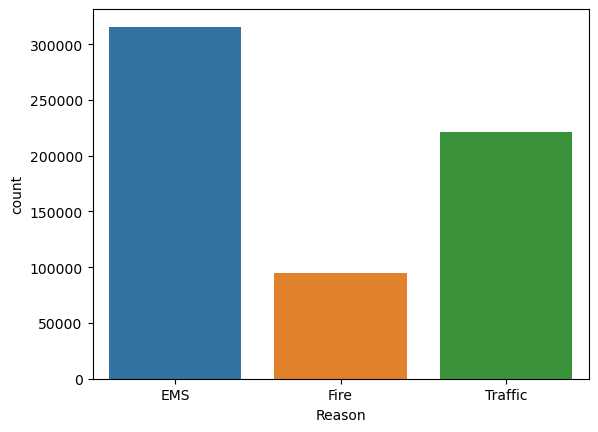

In [122]:
#Create a countplot of 911 calls by department
sns.countplot(x='Reason',data=df)

In [123]:
# The data type of the objects in the timeStamp column
type(df['timeStamp'].iloc[0])

str

In [124]:
# Transform data type of timeStamp column from string into datetime64 

df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
631958   2020-04-28 17:21:20
631959   2020-04-28 17:23:33
631960   2020-04-28 17:26:08
631961   2020-04-28 17:29:50
631962   2020-04-28 17:26:26
Name: timeStamp, Length: 631963, dtype: datetime64[ns]

In [125]:
# Call the hour, month and day of week for timeStamp

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [126]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [127]:
# use .map() function to find the day of week
df['Day of Week'] = df['Day of Week'].map(dmap)

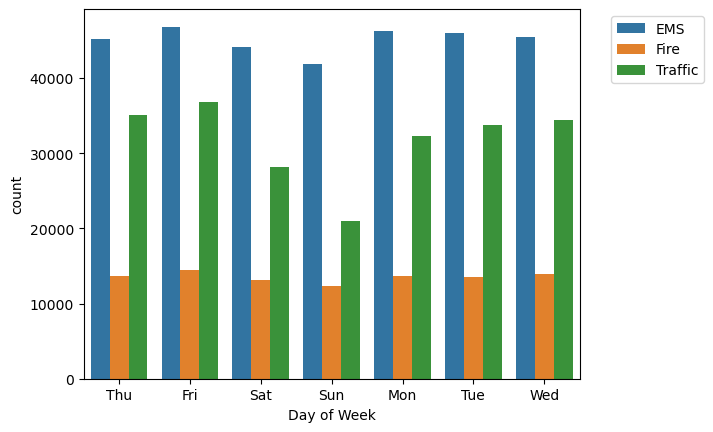

In [128]:
# Countplot the reasons in days of week
sns.countplot(x='Day of Week',data=df, hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.5)

In [129]:
# Use .map() function to find the month
dmap2 = {0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'Jun',6:'Jul',7:'Aug',8:'Sep',9:'Oct',10:'Nov',12:'Dec'}
df['Month'] = df['Month'].map(dmap2)

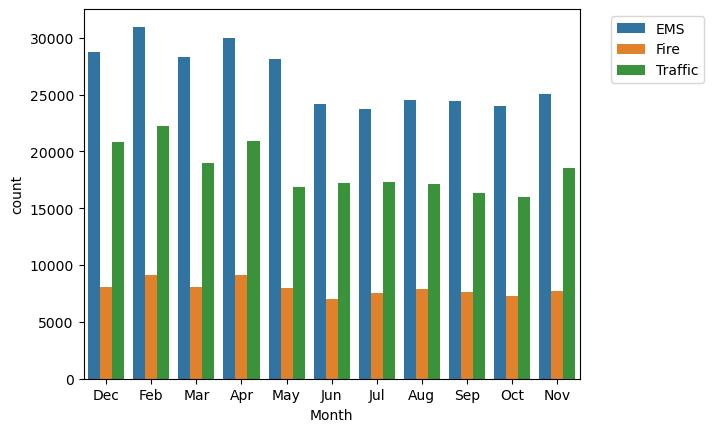

In [130]:
# Countplot the reasons in Month
sns.countplot(x='Month',data=df,hue='Reason')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.5)

In [134]:
byMonth=df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
Apr,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
Aug,49571,49571,49571,43405,49571,49571,49550,49571,49571,49571,49571,49571
Dec,57692,57692,57692,50783,57692,57692,57667,57692,57692,57692,57692,57692
Feb,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
Jul,48493,48493,48493,42223,48493,48493,48466,48493,48493,48493,48493,48493
Jun,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467
Mar,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
May,52956,52956,52956,46685,52956,52956,52940,52956,52956,52956,52956,52956
Nov,51240,51240,51240,44582,51240,51240,51220,51240,51240,51240,51240,51240


<AxesSubplot:xlabel='Month'>

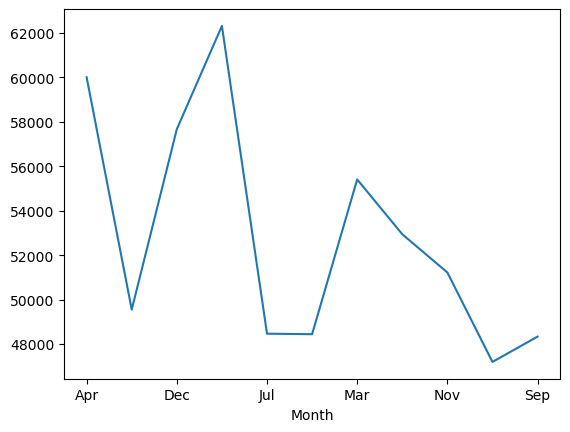

In [132]:
# Simple plot with ByMonth and calls
byMonth['twp'].plot()

In [136]:
# Find the same thing for date by using .apply(), lambda and date()
df['date']=df['timeStamp'].apply(lambda t: t.date())
df['date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
631958    2020-04-28
631959    2020-04-28
631960    2020-04-28
631961    2020-04-28
631962    2020-04-28
Name: date, Length: 631963, dtype: object

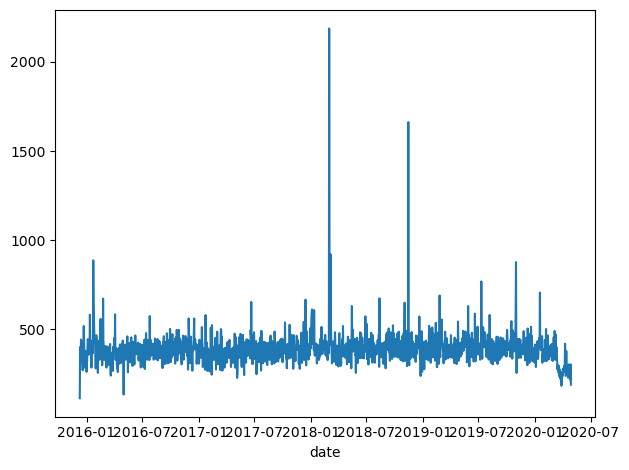

In [138]:
# Plot with the date and twp 
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

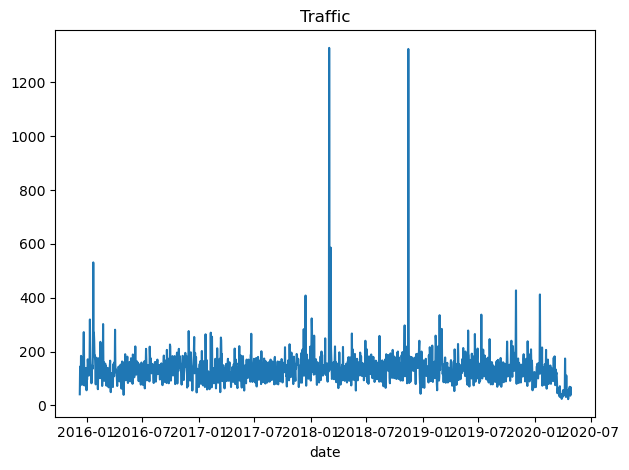

In [139]:
# Create 3 different plots for each reason and date, this is traffic

df[df['Reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

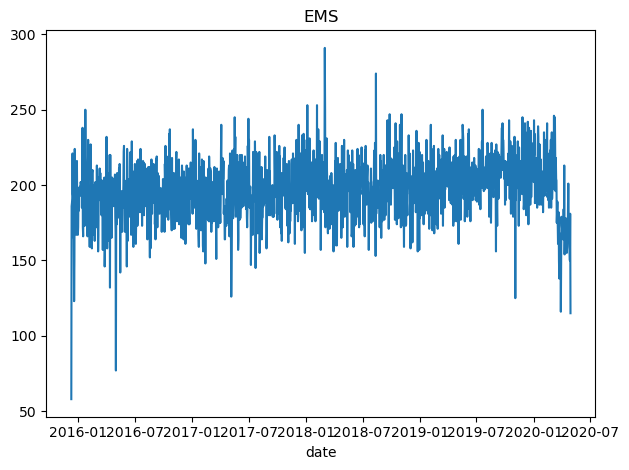

In [140]:
# Create 3 different plots for each reason and date, this is EMS

df[df['Reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

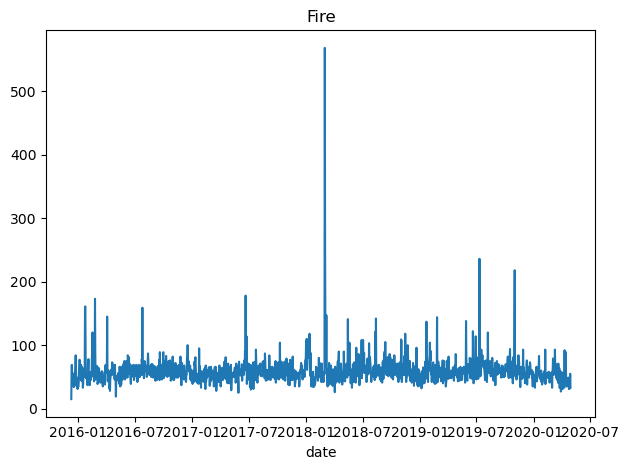

In [141]:
# Create 3 different plots for each reason and date, this is Fire

df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

In [142]:
# Find the dataframe for hours as the columns and Day of the Week as the index

dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1873,1540,1374,1242,1249,1558,2567,3999,4844,5036,...,6078,6705,6776,6817,5401,4809,4142,3692,3256,2714
Mon,1795,1483,1297,1208,1275,1750,2580,4292,5329,5499,...,5399,5906,6054,6155,5207,4275,3598,3096,2539,1970
Sat,2318,1958,1807,1517,1380,1501,1790,2389,3307,4138,...,5156,4931,4966,4951,4768,4543,3943,3706,3061,2826
Sun,2315,2052,1863,1534,1408,1400,1656,2296,2878,3563,...,4491,4254,4316,4299,4183,3967,3550,2984,2481,2206
Thu,1628,1324,1342,1172,1200,1685,2696,4293,5125,5145,...,5788,6168,6077,6655,5260,4466,3888,3331,2699,2248


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

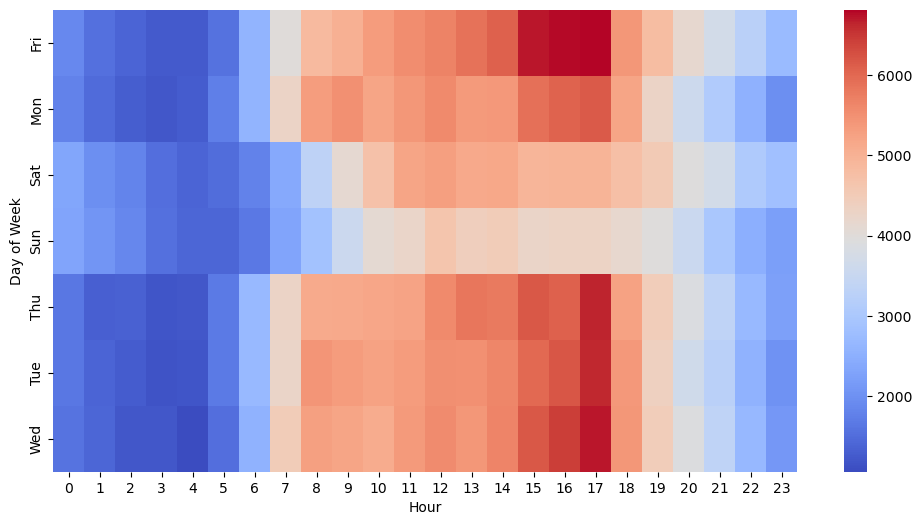

In [148]:
# Plot the heatmap

plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

<Figure size 1200x600 with 0 Axes>

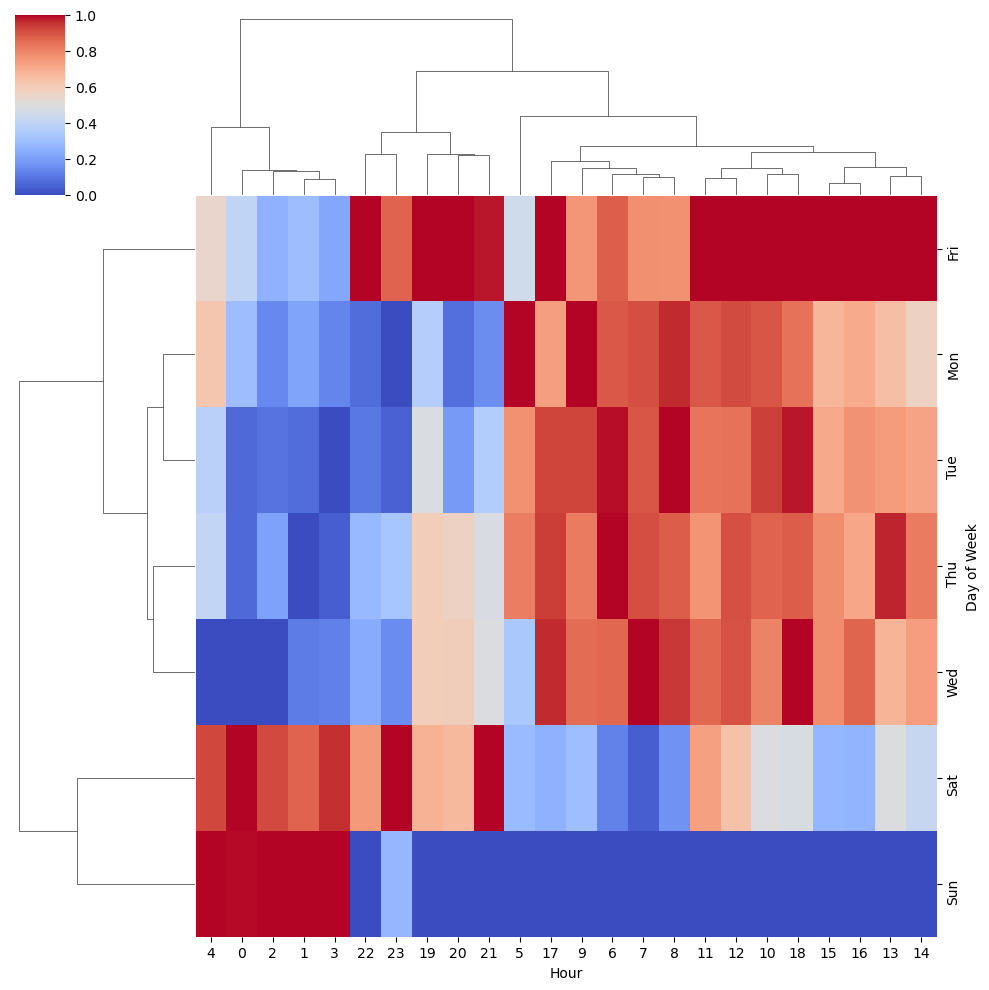

In [149]:
# Plot the clustermap

plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='coolwarm',standard_scale=1)

In [151]:
# Repeat the same steps for Day of Week and Month

DayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
DayMonth.head()

Month,Apr,Aug,Dec,Feb,Jul,Jun,Mar,May,Nov,Oct,Sep
Day of Week,,,,,,,,,,,
Fri,10941,7103,9305,9309,7647,7214,8255,7997,6934,7694,7336
Mon,8060,7929,8492,8896,6740,6746,8747,8410,8075,6598,6854
Sat,8050,6395,8592,8475,6839,5796,7593,7514,6609,6566,6111
Sun,6766,6567,7165,7478,5673,5410,6452,6865,6316,5956,5275
Thu,8849,6964,8151,9055,7850,7524,7997,7332,7482,6954,7508


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

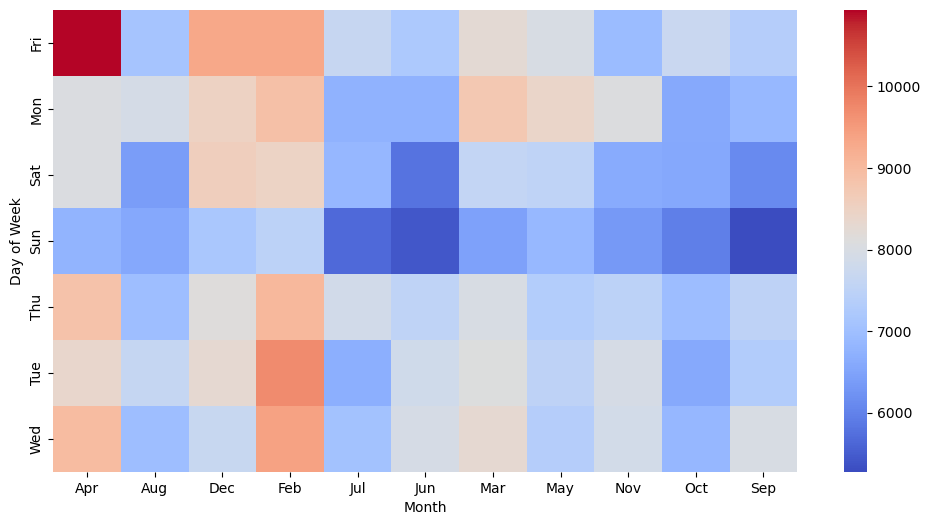

In [152]:
# Plot the heatmap for Day of Week and Month

plt.figure(figsize=(12,6))
sns.heatmap(DayMonth,cmap='coolwarm')

<Figure size 1200x600 with 0 Axes>

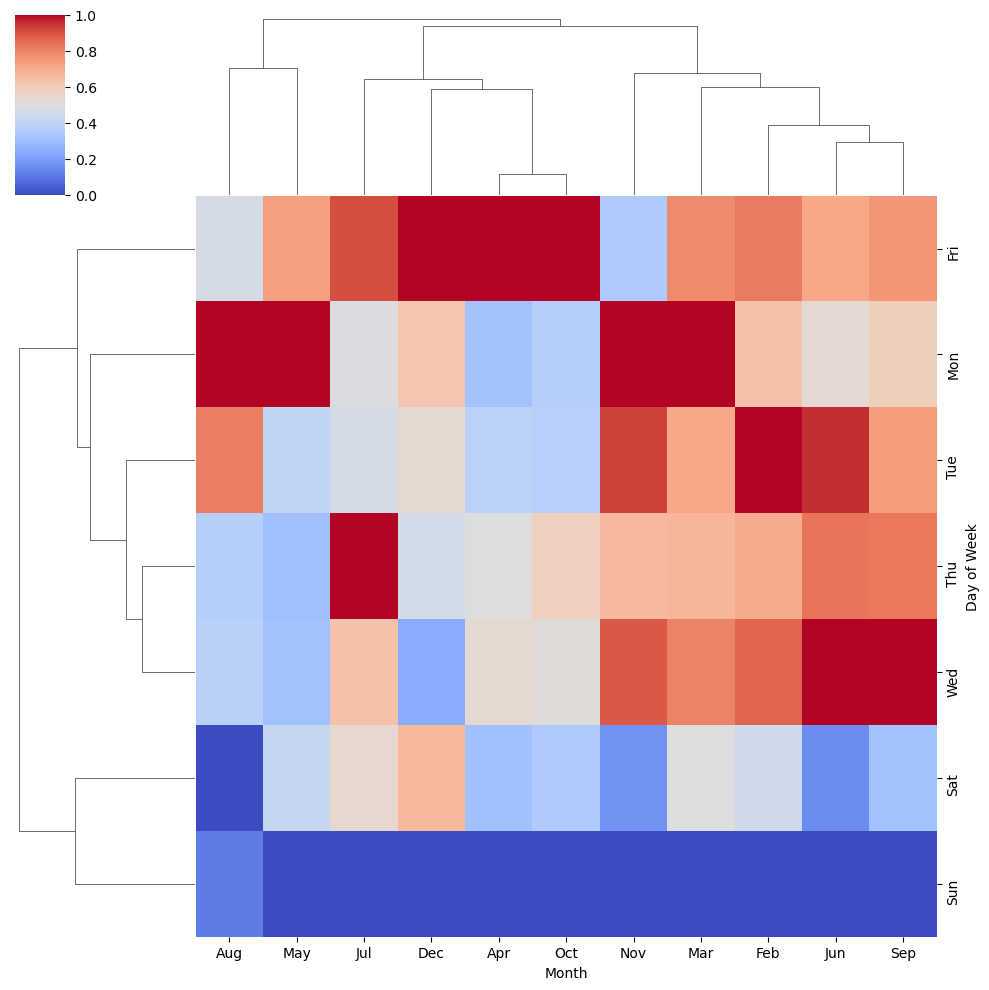

In [153]:
# Plot the clustermap for Day of Week and Month
plt.figure(figsize=(12,6))
sns.clustermap(DayMonth, cmap='coolwarm', standard_scale=1)

End of the project! Thank you! 